In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree, export_text
from sklearn.model_selection import GridSearchCV


In [4]:
df=pd.read_excel("hackthon.xlsx")
df

,age,height_cm,weight_kg,bmi,steps,sleep_hours,sugar_type,time_of_day,suggestion_label,advice_explanation
0,18,175,94,30.69,6220,7.2,cold_drink,morning,drink_water,Sugary drinks or snacks can sometimes make you...
1,23,159,90,35.60,6528,8.9,cold_drink,morning,drink_water,Sugary drinks or snacks can sometimes make you...
2,31,161,73,28.16,1953,4.7,cold_drink,morning,walk,You logged a sugary item during a low-activity...
3,23,172,61,20.62,5357,6.2,packaged_snack,morning,protein_snack,Your activity and sleep look stable today. If ...
4,23,174,75,24.77,5697,8.8,cold_drink,night,drink_water,Sugary drinks or snacks can sometimes make you...
...,...,...,...,...,...,...,...,...,...,...
495,18,166,72,26.13,529,7.1,chai,evening,protein_snack,Your activity and sleep look stable today. If ...
496,31,156,51,20.96,10378,4.0,packaged_snack,night,rest,Your sleep level today appears lower than usua...
497,31,155,93,38.71,6995,6.7,chai,night,protein_snack,Your activity and sleep look stable today. If ...
498,24,170,76,26.30,11879,7.7,cold_drink,morning,drink_water,Sugary drinks or snacks can sometimes make you...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 500 non-null    int64  
 1   height_cm           500 non-null    int64  
 2   weight_kg           500 non-null    int64  
 3   bmi                 500 non-null    float64
 4   steps               500 non-null    int64  
 5   sleep_hours         500 non-null    float64
 6   sugar_type          500 non-null    object 
 7   time_of_day         500 non-null    object 
 8   suggestion_label    500 non-null    object 
 9   advice_explanation  500 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 39.2+ KB


In [7]:
df.describe()

,age,height_cm,weight_kg,bmi,steps,sleep_hours
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,25.144000,167.822000,70.478000,25.33060,6308.068000,6.470000
std,4.227885,10.483612,14.813656,6.29302,3357.897801,1.444435
min,18.000000,150.000000,45.000000,13.73000,514.000000,4.000000
25%,22.000000,159.000000,57.000000,20.15500,3415.750000,5.200000
50%,25.000000,168.000000,70.000000,24.85000,6292.500000,6.500000
75%,29.000000,176.000000,83.000000,29.75000,9367.750000,7.700000
max,32.000000,185.000000,95.000000,41.66000,11993.000000,9.000000


In [8]:
df.isna().sum()

age                   0
height_cm             0
weight_kg             0
bmi                   0
steps                 0
sleep_hours           0
sugar_type            0
time_of_day           0
suggestion_label      0
advice_explanation    0
dtype: int64

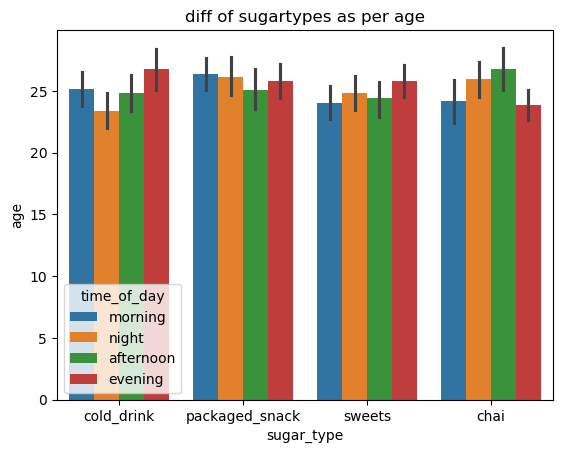

In [13]:
sns.barplot(x="sugar_type",y="age",hue="time_of_day",data=df)
plt.title("diff of sugartypes as per age")
plt.show()

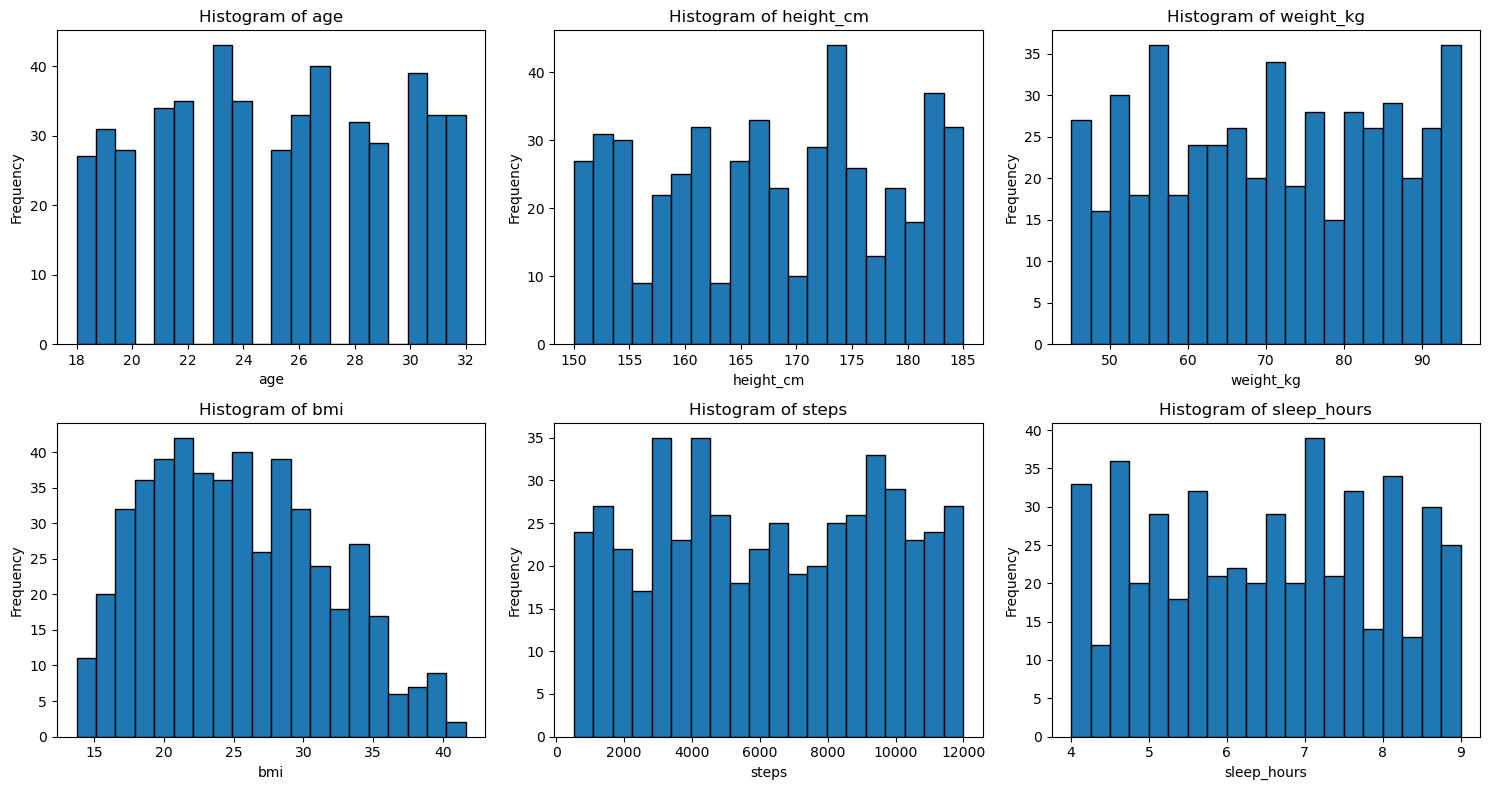

In [15]:

cols = ["age", "height_cm", "weight_kg", "bmi", "steps", "sleep_hours"]
plt.figure(figsize=(15,8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=20,edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


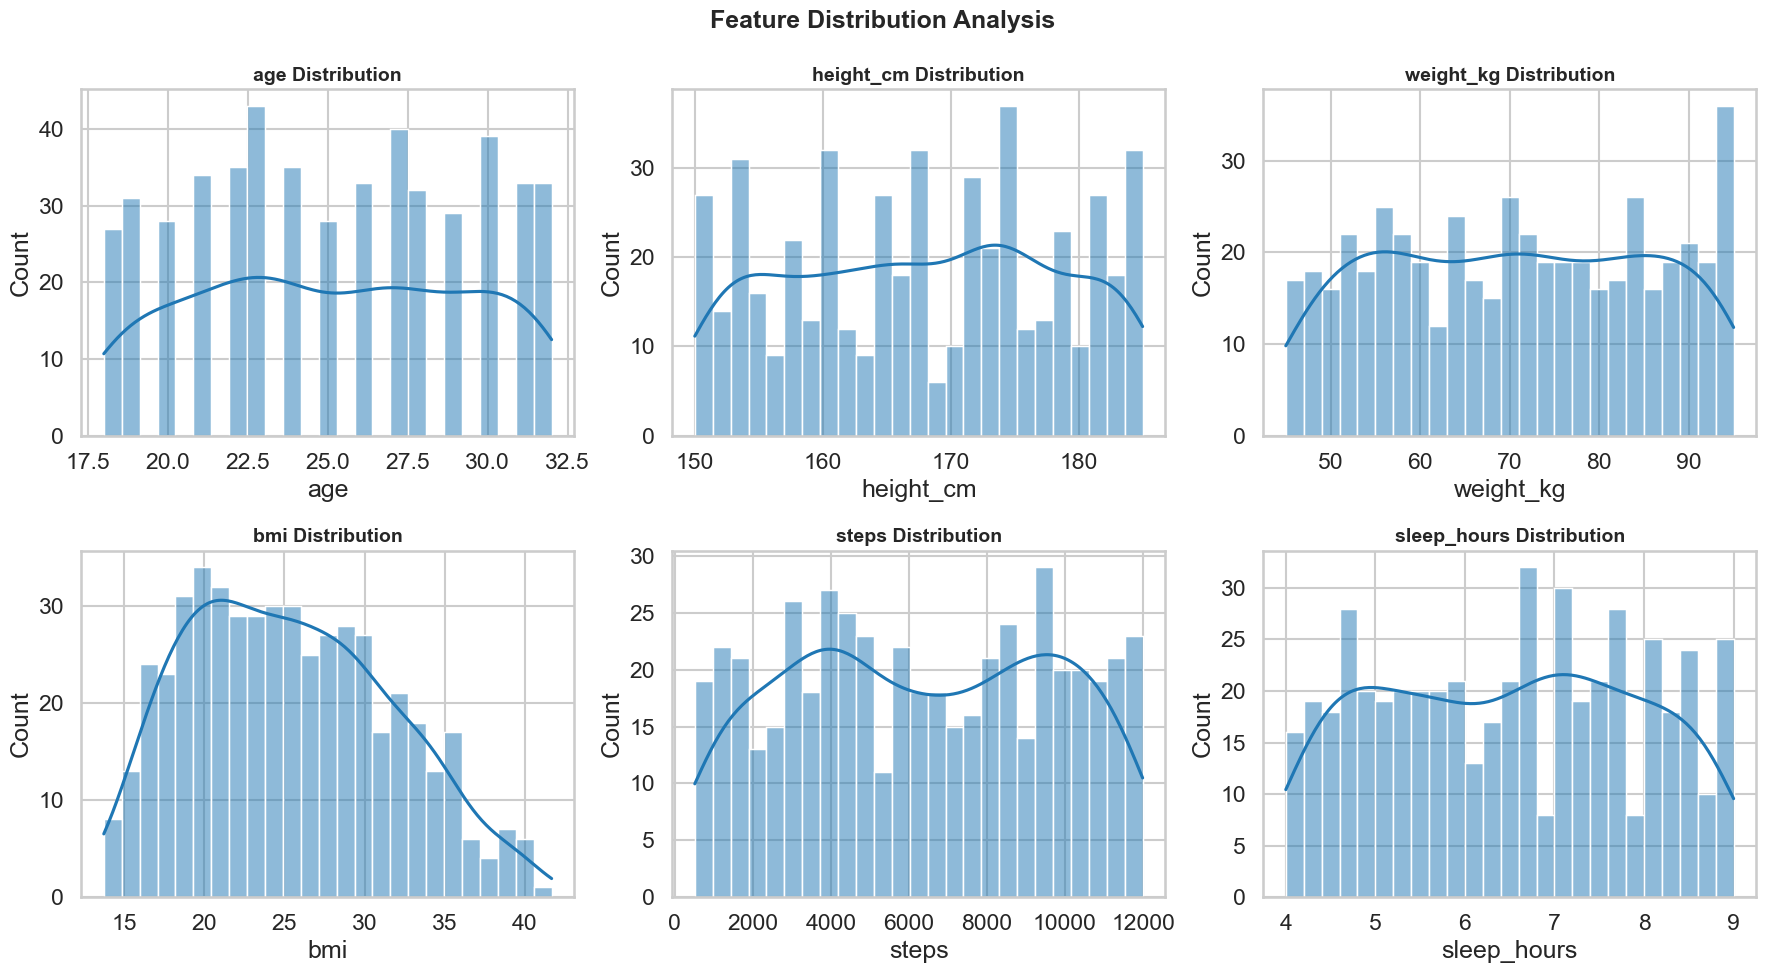

In [16]:

sns.set_style("whitegrid")
sns.set_context("talk")   

cols = ["age", "height_cm", "weight_kg", "bmi", "steps", "sleep_hours"]


fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()


for i, col in enumerate(cols):
    sns.histplot(data=df,x=col, bins=25, kde=True, ax=axes[i] )
    axes[i].set_title(f"{col} Distribution", fontsize=14, weight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")


plt.suptitle("Feature Distribution Analysis", fontsize=18, weight="bold")

plt.tight_layout()
plt.show()


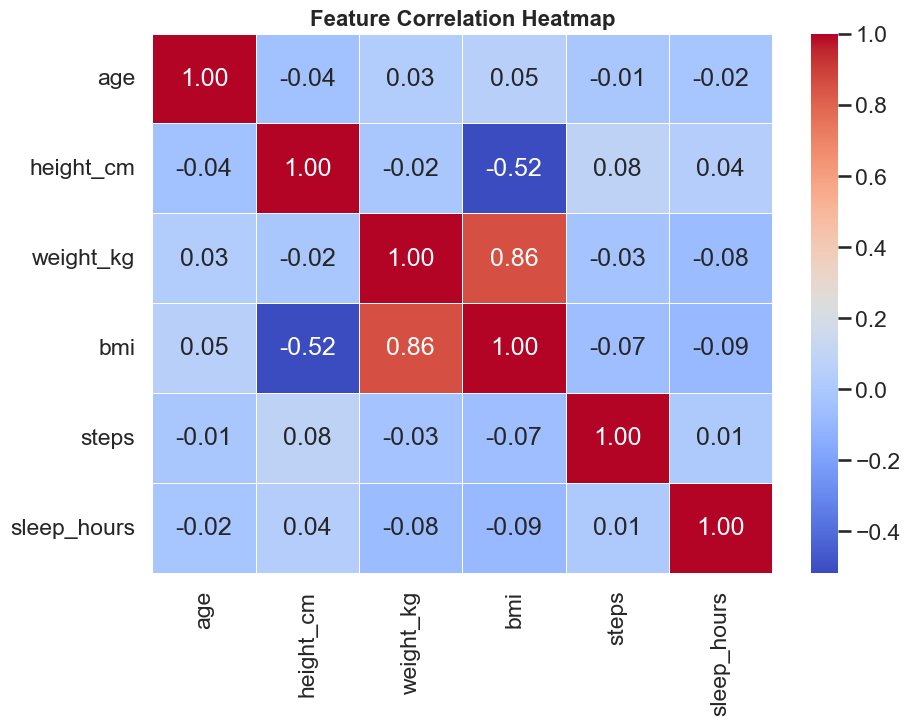

In [17]:
plt.figure(figsize=(10,7))

corr = df[["age","height_cm","weight_kg","bmi","steps","sleep_hours"]].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5)

plt.title("Feature Correlation Heatmap", fontsize=16, weight="bold")
plt.show()


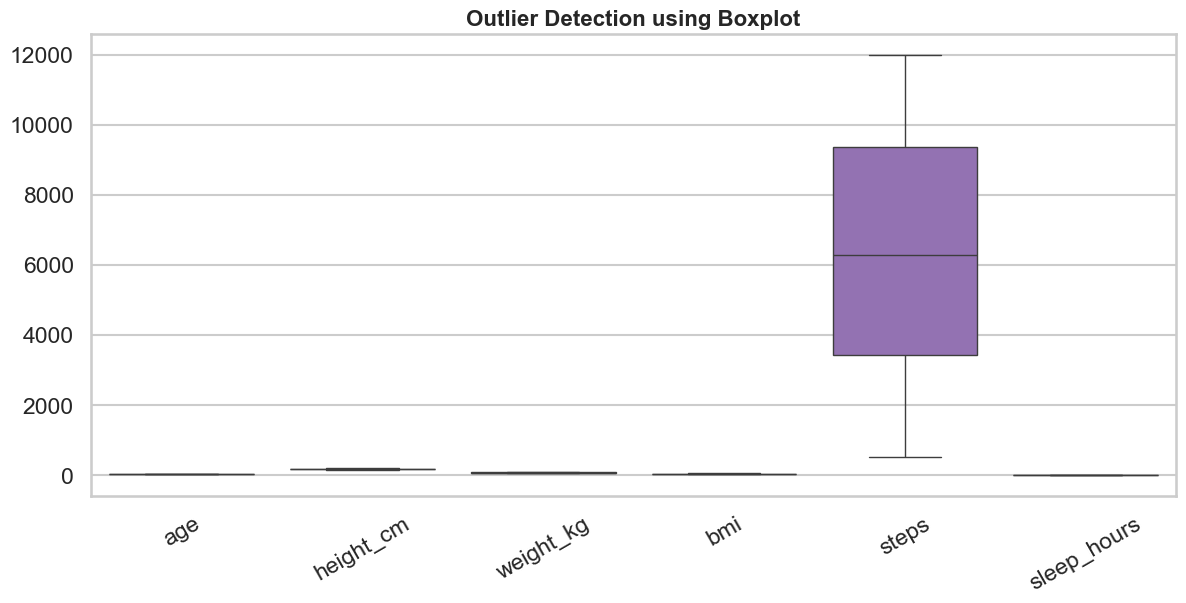

In [18]:
plt.figure(figsize=(14,6))

sns.boxplot(
    data=df[["age","height_cm","weight_kg","bmi","steps","sleep_hours"]]
)

plt.title("Outlier Detection using Boxplot", fontsize=16, weight="bold")
plt.xticks(rotation=30)
plt.show()


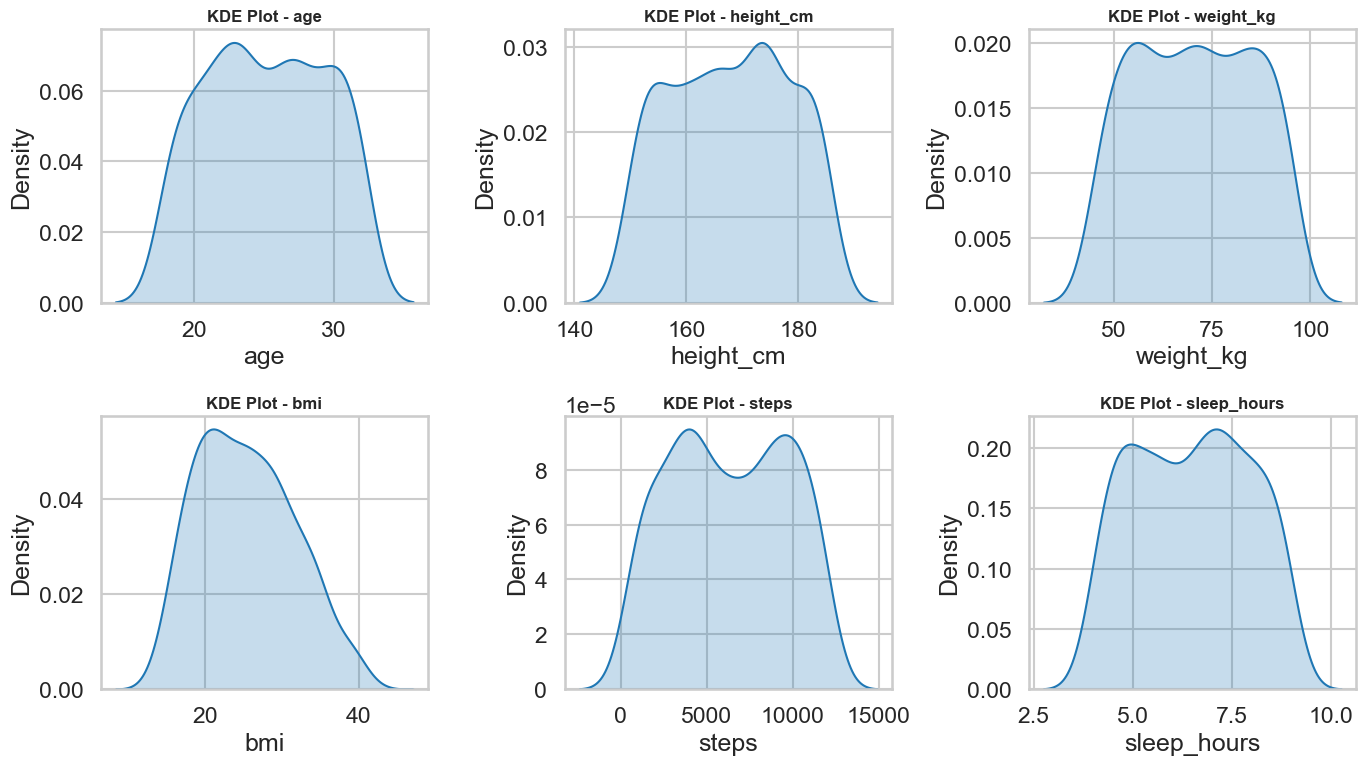

In [19]:
plt.figure(figsize=(14,8))

cols = ["age","height_cm","weight_kg","bmi","steps","sleep_hours"]

for i, col in enumerate(cols, 1):
    plt.subplot(2,3,i)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"KDE Plot - {col}", fontsize=12, weight="bold")

plt.tight_layout()
plt.show()


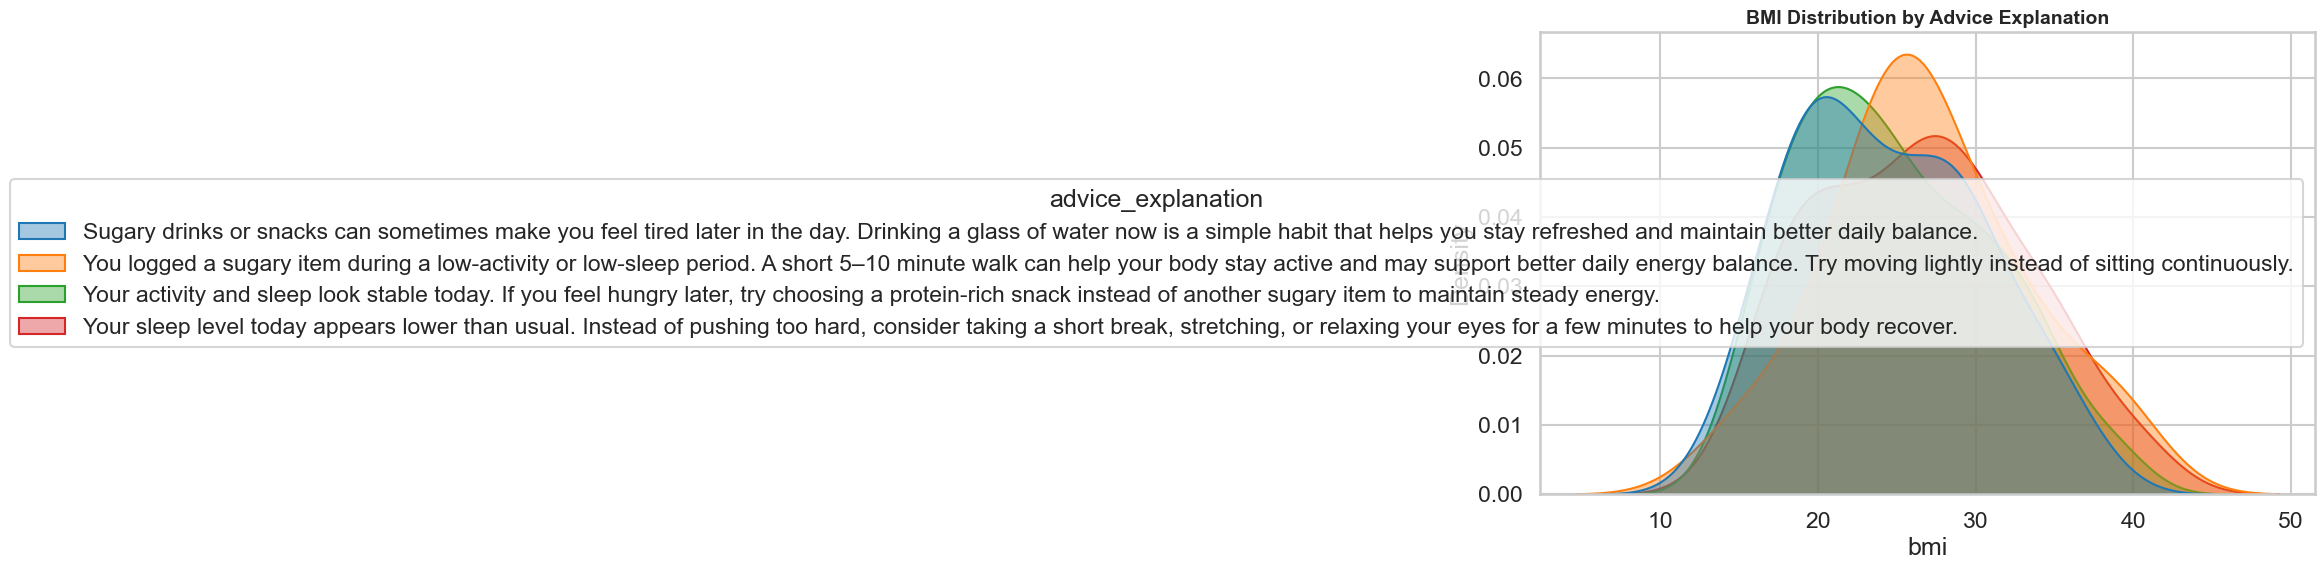

In [20]:
plt.figure(figsize=(10,6))

sns.kdeplot(
    data=df,
    x="bmi",
    hue="advice_explanation",   
    fill=True,
    common_norm=False,
    alpha=0.4
)

plt.title("BMI Distribution by Advice Explanation", fontsize=14, weight="bold")
plt.show()


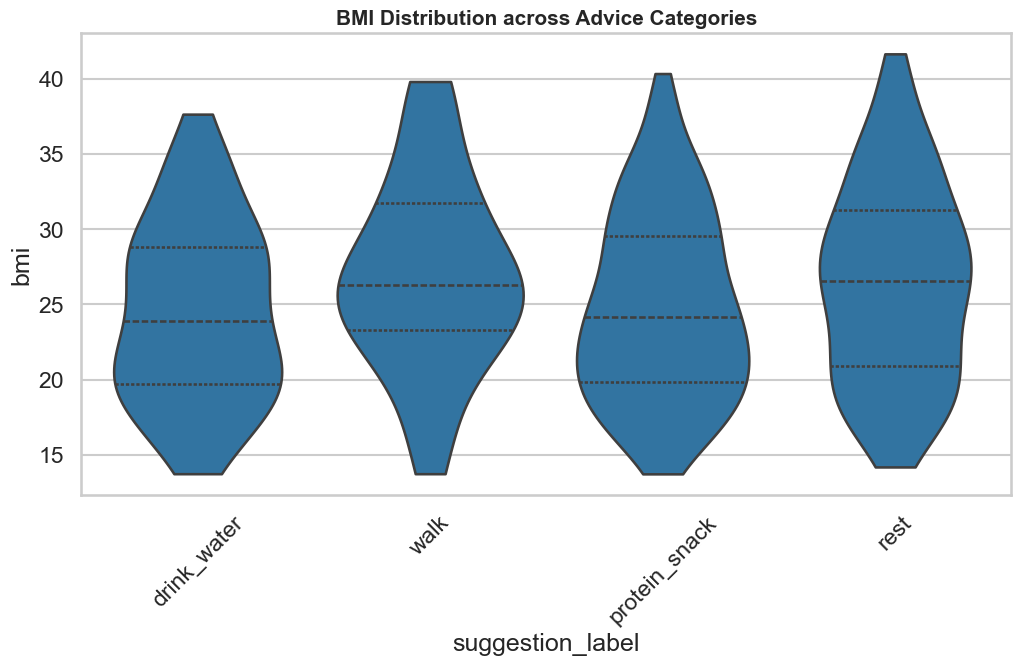

In [22]:
plt.figure(figsize=(12,6))

sns.violinplot(
    data=df,
    x="suggestion_label",
    y="bmi",
    inner="quartile",
    cut=0
)

plt.title("BMI Distribution across Advice Categories", fontsize=15, weight="bold")
plt.xticks(rotation=45)
plt.show()


In [24]:
X = df[["age","height_cm","weight_kg","bmi","steps","sleep_hours"]]
y = df["suggestion_label"]  




In [25]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [26]:
advice_map = dict(zip(df["suggestion_label"],
                      df["advice_explanation"]))


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


In [28]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [29]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [30]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.75      0.96      0.84        56
           2       0.95      1.00      0.97        18
           3       1.00      0.88      0.93         8

    accuracy                           0.79       100
   macro avg       0.67      0.71      0.69       100
weighted avg       0.67      0.79      0.72       100



In [31]:
def predict_user(age, height, weight, bmi, steps, sleep):

    user_data = np.array([[age, height, weight, bmi, steps, sleep]])

    user_scaled = scaler.transform(user_data)

    pred = model.predict(user_scaled)

    label = le.inverse_transform(pred)[0]

    explanation = advice_map[label]

    print("\n✅ AI Suggestion:", label)
    print("\n📌 Advice Explanation:")
    print(explanation)


In [35]:
import pickle
import os

os.makedirs("model", exist_ok=True)


pickle.dump(model, open("model/model.pkl","wb"))
pickle.dump(scaler, open("model/scaler.pkl","wb"))
pickle.dump(le, open("model/label_encoder.pkl","wb"))
pickle.dump(advice_map, open("model/advice_map.pkl","wb"))

print("✅ Model files saved successfully!")


✅ Model files saved successfully!
